## Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

Let's start the project by reading in the file and explore briefly the data set.

In [1]:
import pandas as pd
fcc_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = 0)
print(fcc_survey.shape)
print(fcc_survey.head())

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN    

## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

   + Where are these new coders located.
   + What are the locations with the greatest number of new coders.
   + How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

First, we will analyze 'JobRoleInterest' column to figure out whether the sample we have is representative for our population of interest. 'JobRoleInterest' column describes for every participant the role(s) they'd be interested in working. If a participant is interested in working in a domain, it's likely that the participant is also interested in learning about that domain. 

In [2]:
#Generate a frequency distribution table for the column.
jobrole = fcc_survey['JobRoleInterest'].value_counts(normalize = True) * 100
print(jobrole)

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

After taking a quick look at the above frequency table, we can draw several conclusions as follows:

   + The results are quite granular.
   + The marjority of the participants are interested in roles like web developer.
   + a few participants are interested in mobile developer.
   + Most of the participants would like to work in web and mobile development areas.
   
Lots of participants are interested in more than one subject. It means that the participants would like to learn about multiple subjects. This actually is good for us. 

Next, we will split the domains in job roles to explore the number of options for each respondent. But at first, let's drop non values because we couldn't split non values.

In [3]:
interests_role = fcc_survey['JobRoleInterest'].copy().dropna()
interests_role_split = interests_role.str.split(",")
role_split_number = interests_role_split.apply(lambda x: len(x))
role_split_number.value_counts(normalize = True).sort_index() *100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We notice that only 31.65% of respondents are interested in only one domain, while the marjority of them are open to more than one subjects.

Most of the courses we offer are on web and mobile development. So let's figure out how many participants are interested in at least one of these two areas.

In [4]:
web_or_mobile=interests_role.str.contains("Web Developer|Mobile Developer")
web_or_mobile_freq = web_or_mobile.value_counts(normalize = True) * 100
print(web_or_mobile_freq)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


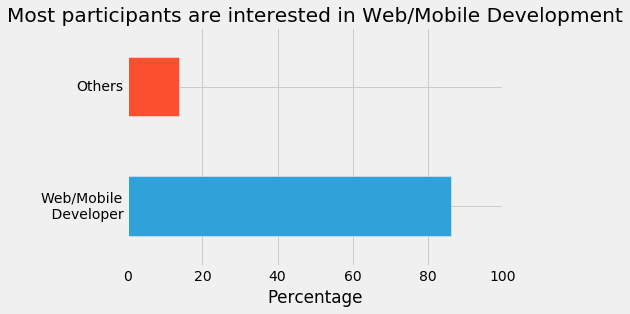

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
web_or_mobile_freq.plot.barh()
plt.title("Most participants are interested in Web/Mobile Development")
plt.yticks([0,1], ['Web/Mobile\n Developer', 'Others'])
plt.xlim(0,100)
plt.xlabel('Percentage')

It turns out that 86% of the participants are interested in web or mobile development. Given the focus of our courses, this sample is completely representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web or mobile development.

Now we need to figure out what are the best markets to advertise our courses.

## New Coders - Locations and Densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The "CountryCitizen" variable describes the country of origin for each participant, and the "CountryLive" variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the "CountryLive" variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

To make sure we are working with a representative sample, we need to drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [6]:
#Drop all the rows where 'JobRoleInterest' column has null value.
print(fcc_survey['JobRoleInterest'].head())
index_names = fcc_survey[fcc_survey['JobRoleInterest'].isnull()].index
new_fcc_survey = fcc_survey.drop(index_names).copy()
print(new_fcc_survey['JobRoleInterest'].head())

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
6                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object


With the new survey data, let's generate a frequency table for the "CountryLive" variable.

In [7]:
freq_absolute = new_fcc_survey['CountryLive'].value_counts()
print(freq_absolute)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

In [8]:
freq_relative = new_fcc_survey['CountryLive'].value_counts(normalize = True) * 100
print(freq_relative)

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Philippines                       0.760456
Serbia                            0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

Based on the relative frequency table, about half of the participants live in the USA. 7% of the respondents live in India, which has a little bit more students than the United Kingdom and Canada. So the two most promising markets we would choose for advertisement are United States of America and India. 

This information is useful. However, we need to explore more in depth to figure out how much money people are willing to spend for learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

The "MoneyForLearning" column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company currently sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
   + These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
   + Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.
   
We don't have a column for the amount of money a student has spent per month in the data set. We need to create such a column by dividing the 'MoneyForLearning' column to the 'MonthsProgramming' column. In addition, some respondents answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, we need to replace all the values of 0 with 1.

In [9]:
print(new_fcc_survey['MonthsProgramming'].head())

1     6.0
2     5.0
3     5.0
4    24.0
6    12.0
Name: MonthsProgramming, dtype: float64


In [10]:
print(new_fcc_survey['MoneyForLearning'].head())

1      80.0
2    1000.0
3       0.0
4       0.0
6       0.0
Name: MoneyForLearning, dtype: float64


In [11]:
beginner= new_fcc_survey['MonthsProgramming']==0
new_fcc_survey.loc[beginner,'MonthsProgramming']= 1
new_fcc_survey['MonthlyPayment'] = new_fcc_survey['MoneyForLearning'] / new_fcc_survey['MonthsProgramming']
new_fcc_survey = new_fcc_survey[new_fcc_survey['MonthlyPayment'].notnull()]

Let's keep only the rows that don't have a null values in the 'CountryLive' column.

In [12]:
new_fcc_survey = new_fcc_survey[new_fcc_survey['CountryLive'].notnull()].copy()
new_fcc_survey['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

We can group the remaining data by the 'CountryLive' Column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [13]:
fcc_mean = new_fcc_survey.groupby(['CountryLive']).mean()['MonthlyPayment']
print(fcc_mean[['United States of America', 'India', 'United Kingdom', 'Canada']])

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlyPayment, dtype: float64


We are also interested in the median and the mode of the 'MonthlyPayment' column. Let's calculate them and compare them with the mean.

In [14]:
fcc_median = new_fcc_survey.groupby(['CountryLive'])['MonthlyPayment'].median()
print(fcc_median[['United States of America', 'India', 'United Kingdom', 'Canada']])

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: MonthlyPayment, dtype: float64


In [15]:
new_fcc_survey[new_fcc_survey['CountryLive']=='United States of America']['MonthlyPayment'].mode()

0    0.0
dtype: float64

In [16]:
new_fcc_survey[new_fcc_survey['CountryLive']=='India']['MonthlyPayment'].mode()

0    0.0
dtype: float64

In [17]:
new_fcc_survey[new_fcc_survey['CountryLive']=='United Kingdom']['MonthlyPayment'].mode()

0    0.0
dtype: float64

In [18]:
new_fcc_survey[new_fcc_survey['CountryLive']=='Canada']['MonthlyPayment'].mode()

0    0.0
dtype: float64

Since 'MonthlyPayment' column contains a variable measured on a ratio scale, the mean is the best way to describe the average for the values. 

Comparing the mean of the money spent on learning for the participants in the four countries, it is surprising that students in India spend more money monthly than those live in Canada and the United Kingdom. This is probably that we don't have enough representative samples for Canada and the United Kingdom. Or there might be outliers (maybe coming from wrong survey answers) in the data for India or Canada or the United Kingdom. Or it might be the correct result.

## Dealing with Extreme Outliers

To identify any outliers in the data set, we will generate box plots for the 'MonthlyPayment' column with each country (the United States of America, India, the United Kingdom, and Canada) to visualize the distribution of the variable.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



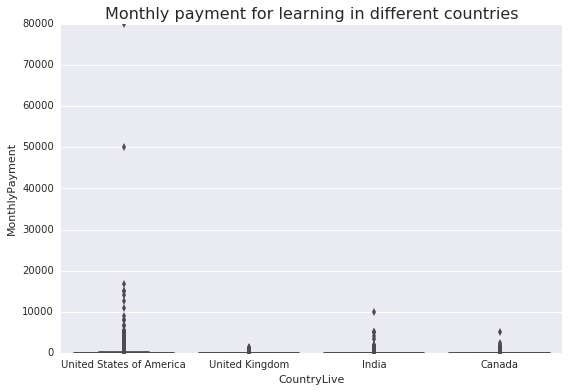

In [19]:
four_countries = new_fcc_survey[new_fcc_survey['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
import seaborn as sns
sns.boxplot(x= 'CountryLive', y = 'MonthlyPayment', data = four_countries)
plt.title("Monthly payment for learning in different countries", fontsize = 16)
plt.show()

From the above box plot, we don't find any extreme outliers for India, compared with the United Kingdom and Canada. However, there are two students in the United States of America spending \$50000 and \$80000 per month for learning, which is impossible. Next, we will eliminate those outliers who spend more than \$20000 per month.

In [20]:
wo_outliers = four_countries[four_countries['MonthlyPayment']<20000]

Let's recalculate the mean and regenerate the box plot to show the distributions.

In [21]:
wo_outliers.pivot_table('MonthlyPayment', 'CountryLive')

,MonthlyPayment
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,183.800110


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



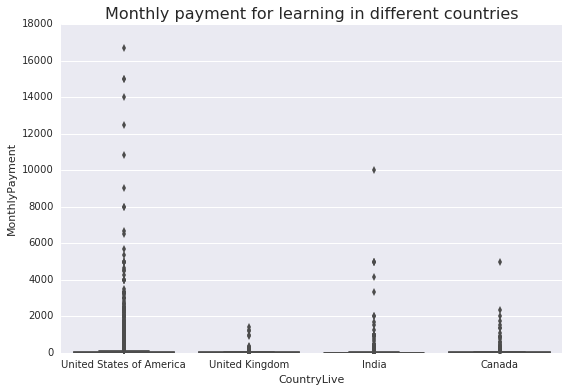

In [22]:
sns.boxplot(x= 'CountryLive', y = 'MonthlyPayment', data = wo_outliers)
plt.title("Monthly payment for learning in different countries", fontsize = 16)
plt.show()

Without the extreme outliers, we can observe the box plot in detail. It's interesting to notice that several participants in India spend more than \$3000 per month for learning. Let's take a look at the answers from these students.

In [23]:
india_outlier = wo_outliers[(wo_outliers['CountryLive']=='India') & (wo_outliers['MonthlyPayment']>3000)]
india_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPayment
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It looks like that all of the six outliers didn't attend to any bootcamps. It is hard to figure out whether these persons really spent that much money for learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these rows.   

In [24]:
wo_outliers = wo_outliers.drop(india_outlier.index)

There are still a few respondents who would like to spend more than \$6000 a month for learning, which is a little too much than the average. Next, we will handle these outliers.

In [25]:
usa_outlier = wo_outliers[(wo_outliers['CountryLive']=='United States of America') & (wo_outliers['MonthlyPayment']>6000)]
usa_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPayment
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Among the eleven outliers above, there are six respondents attending bootcamps. We have the same problem with the rest five respondents. We couldn't identify the truth whether they spend that much money on learning. It's safe that we remove them.

In addition, four out of the six students attending bootcamps haven't finished the bootcamp yet. So that means for the rest of time of the bootcamps, they will learn programming for free. The rest of two students learned programming for only one month. That means they finished the bootcamp within one month, which is likely impossible. The monthly payment we get from those respondents are incorrect. We'd better remove all of these six rows.

In [26]:
# finish_bootcamp = usa_outlier[usa_outlier['BootcampFinish']== 1.0]
# usa_outlier = usa_outlier.drop(finish_bootcamp.index)
wo_outliers = wo_outliers.drop(usa_outlier.index)

Next, let's deal with the data for students live in Canada. From the above box plot, one student spent more than \$4000 per month for learning. Let's take a look at the answers from this student.

In [27]:
canada_outlier = wo_outliers[(wo_outliers['CountryLive']=='Canada') & (wo_outliers['MonthlyPayment']>4000)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyPayment
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The situation here is similar with some of the US respondent. This student paid a \$10000 at the beginning to enroll in a bootcamp and have learned for no more than two months when he/she completed the survey. It's likely that the student will learning programming for free in the rest of the bootcamp. We will take the same approach here as for the US and remove this row.

In [28]:
wo_outliers = wo_outliers.drop(canada_outlier.index)

After removing all of these outliers, let's recompute the mean and recreate the box plot.

In [29]:
wo_outliers.pivot_table('MonthlyPayment', 'CountryLive')

,MonthlyPayment
CountryLive,
Canada,93.065400
India,65.758763
United Kingdom,45.534443
United States of America,142.654608


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



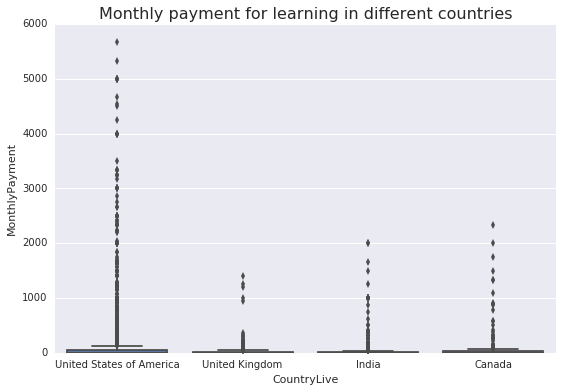

In [30]:
sns.boxplot(x= 'CountryLive', y = 'MonthlyPayment', data = wo_outliers)
plt.title("Monthly payment for learning in different countries", fontsize = 16)
plt.show()

## Choosing the Two Best Markets

After eliminating the extreme outliers, we got the updated mean values for monthly payment for each country.

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money for learning each month.

We need to choose one more market though.

In [31]:
wo_outliers['CountryLive'].value_counts(normalize = True) *100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

If taking the monthly payment into consideration, Canada is better than India. Because people live in Canada would like to spend more money (\$93) than people in India (\$66) each month. Both of their monthly payments are more than our subscription (\$59). However, there are more potential new coders in India (11.7%) than in Canada(6.1%).

So we have different advertising plans as follows:
1. Advertise in the US, Canada and India, and split the advertising budget in various combinations:

   + %75 for the US, 15% for India, and %10 for Canada.
   + %50 for the US, 30% for Canada, and 20% for India.
   + etc.
   
2. Advertise only in the US and Canada, or in the US and India. Split the advertising budget unequally:

   + %80 for the US, 20% for India.
   + %65 for the US, 36% for Canada.
   + etc.
   
3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.